In [ ]:
# Neuroninių tinklų ir ML modelių palyginimas (LSTM, GRU, CNN, Transformer, ML, Ansamblis)
#
# Šiame notebook palyginsime visus neuroninius tinklus (LSTM, GRU, CNN, Transformer), klasikinius ML modelius ir ansamblį pagal RMSE, MAPE ir prekybos rezultatus.

In [1]:
# Reikalingų bibliotekų importavimas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import pickle
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)

In [2]:
# Užkrauname visų modelių metrikas
models_dir = '../../models'

def load_metrics(path):
    try:
        with open(path, 'r') as f:
            return json.load(f)
    except Exception:
        return None

lstm_info = load_metrics(f'{models_dir}/lstm_model_info.json')
gru_info = load_metrics(f'{models_dir}/gru_model_info.json')
cnn_info = load_metrics(f'{models_dir}/cnn_model_info.json')
transformer_info = load_metrics(f'{models_dir}/transformer_model_info.json')
ensemble_info = load_metrics(f'{models_dir}/ensemble_model_info.json')

try:
    with open(f'{models_dir}/ml_models_info.json', 'r') as f:
        ml_models_info = json.load(f)
    rf_info = ml_models_info.get('RandomForest', {'metrics': {'rmse': None, 'mape': None}})
    xgb_info = ml_models_info.get('XGBoost', {'metrics': {'rmse': None, 'mape': None}})
    ml_models_available = True
except FileNotFoundError:
    rf_info = {'metrics': {'rmse': None, 'mape': None}}
    xgb_info = {'metrics': {'rmse': None, 'mape': None}}
    ml_models_available = False

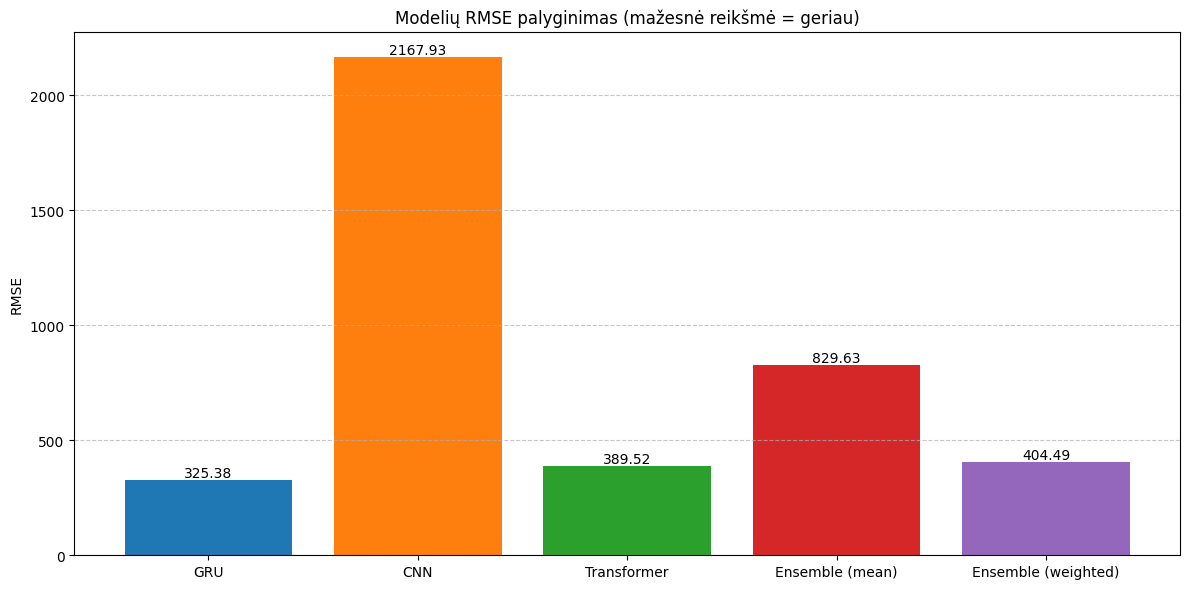

In [3]:
# Vizualizuojame RMSE palyginimą tarp visų modelių
models = []
rmse_values = []

if lstm_info is not None:
    models.append('LSTM')
    rmse_values.append(lstm_info['metrics']['rmse'])
if gru_info is not None:
    models.append('GRU')
    rmse_values.append(gru_info['metrics']['rmse'])
if cnn_info is not None:
    models.append('CNN')
    rmse_values.append(cnn_info['metrics']['rmse'])
if transformer_info is not None:
    models.append('Transformer')
    rmse_values.append(transformer_info['metrics']['rmse'])
if ml_models_available:
    if rf_info['metrics']['rmse'] is not None:
        models.append('RandomForest')
        rmse_values.append(rf_info['metrics']['rmse'])
    if xgb_info['metrics']['rmse'] is not None:
        models.append('XGBoost')
        rmse_values.append(xgb_info['metrics']['rmse'])
if ensemble_info is not None:
    if 'ensemble_mean' in ensemble_info:
        models.append('Ensemble (mean)')
        rmse_values.append(ensemble_info['ensemble_mean']['rmse'])
    if 'ensemble_weighted' in ensemble_info:
        models.append('Ensemble (weighted)')
        rmse_values.append(ensemble_info['ensemble_weighted']['rmse'])

if len(models) >= 2:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, rmse_values, color=plt.cm.tab10.colors[:len(models)])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    plt.title('Modelių RMSE palyginimas (mažesnė reikšmė = geriau)')
    plt.ylabel('RMSE')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Nepakanka modelių RMSE vizualizacijai (reikia bent dviejų).")

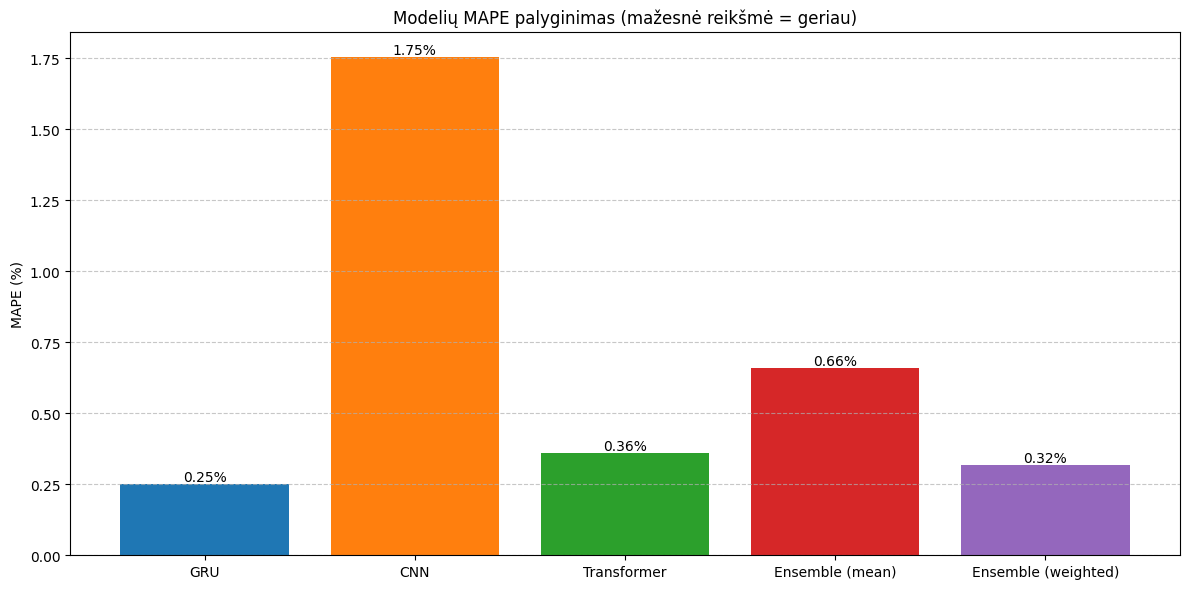

In [4]:
# Vizualizuojame MAPE palyginimą tarp visų modelių
models = []
mape_values = []

if lstm_info is not None:
    models.append('LSTM')
    mape_values.append(lstm_info['metrics']['mape'])
if gru_info is not None:
    models.append('GRU')
    mape_values.append(gru_info['metrics']['mape'])
if cnn_info is not None:
    models.append('CNN')
    mape_values.append(cnn_info['metrics']['mape'])
if transformer_info is not None:
    models.append('Transformer')
    mape_values.append(transformer_info['metrics']['mape'])
if ml_models_available:
    if rf_info['metrics']['mape'] is not None:
        models.append('RandomForest')
        mape_values.append(rf_info['metrics']['mape'])
    if xgb_info['metrics']['mape'] is not None:
        models.append('XGBoost')
        mape_values.append(xgb_info['metrics']['mape'])
if ensemble_info is not None:
    if 'ensemble_mean' in ensemble_info:
        models.append('Ensemble (mean)')
        mape_values.append(ensemble_info['ensemble_mean']['mape'])
    if 'ensemble_weighted' in ensemble_info:
        models.append('Ensemble (weighted)')
        mape_values.append(ensemble_info['ensemble_weighted']['mape'])

if len(models) >= 2:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, mape_values, color=plt.cm.tab10.colors[:len(models)])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',
                 ha='center', va='bottom')
    plt.title('Modelių MAPE palyginimas (mažesnė reikšmė = geriau)')
    plt.ylabel('MAPE (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Nepakanka modelių MAPE vizualizacijai (reikia bent dviejų).")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
LSTM modelio prognozės užkrautos.
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
GRU modelio prognozės užkrautos.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
CNN modelio prognozės užkrautos.
Nepavyko užkrauti Transformer modelio: Unknown layer: 'TimeSeriesTransformer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


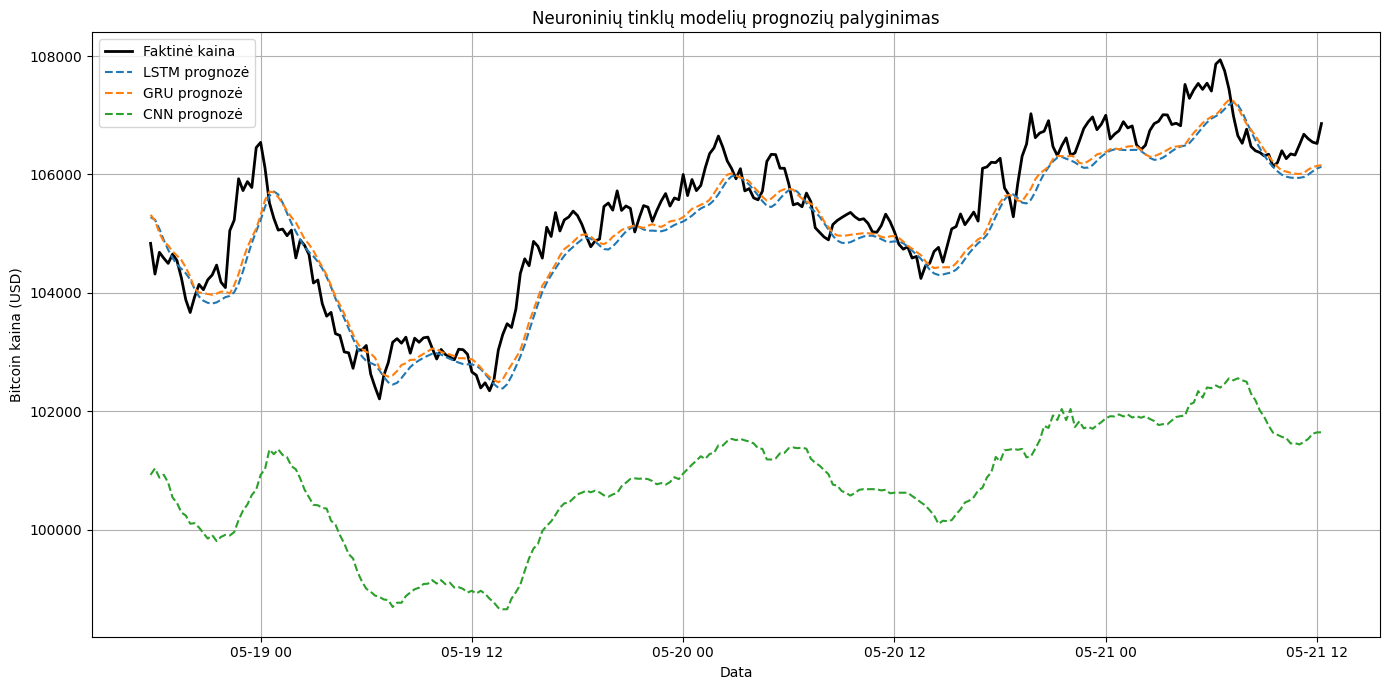

In [5]:
# Vizualizuojame neuroninių tinklų modelių prognozes (LSTM, GRU, CNN, Transformer)
import time

def inverse_transform_predictions(predictions, scaler, target_idx=3, feature_columns=None):
    dummy = np.zeros((len(predictions), len(feature_columns)))
    dummy[:, target_idx] = predictions.flatten()
    inverse_predicted = scaler.inverse_transform(dummy)
    return inverse_predicted[:, target_idx]

# Užkrauname scaler
scaler_path = f'{models_dir}/lstm_scaler.pkl'
if not os.path.exists(scaler_path):
    scaler_path = f'{models_dir}/gru_scaler.pkl'
if not os.path.exists(scaler_path):
    scaler_path = f'{models_dir}/cnn_scaler.pkl'
if not os.path.exists(scaler_path):
    scaler_path = f'{models_dir}/transformer_scaler.pkl'
with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)

# Užkrauname test duomenis
import requests
from datetime import datetime, timedelta

BINANCE_API_URL = "https://api.binance.com/api/v3/klines"
def get_historical_klines(symbol="BTCUSDT", interval="15m", start_time=None, end_time=None):
    if end_time is None:
        end_time = datetime.now()
    if start_time is None:
        start_time = end_time - timedelta(days=14)
    start_ts = int(start_time.timestamp() * 1000)
    end_ts = int(end_time.timestamp() * 1000)
    all_klines = []
    current_start = start_ts
    while current_start < end_ts:
        params = {
            'symbol': symbol,
            'interval': interval,
            'startTime': current_start,
            'endTime': end_ts,
            'limit': 1000
        }
        try:
            response = requests.get(BINANCE_API_URL, params=params)
            response.raise_for_status()
            klines = response.json()
            if not klines:
                break
            all_klines.extend(klines)
            current_start = int(klines[-1][0]) + 1
            time.sleep(0.5)
        except Exception as e:
            print(f"Klaida gaunant duomenis: {str(e)}")
            time.sleep(2)
    if all_klines:
        columns = ['time', 'open', 'high', 'low', 'close', 'volume', 
                   'close_time', 'quote_asset_volume', 'number_of_trades',
                   'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
        df = pd.DataFrame(all_klines, columns=columns)
        df['time'] = pd.to_datetime(df['time'], unit='ms')
        numeric_columns = ['open', 'high', 'low', 'close', 'volume']
        df[numeric_columns] = df[numeric_columns].astype(float)
        return df
    return None

end_time = datetime.now()
start_time = end_time - timedelta(days=14)
df = get_historical_klines(symbol="BTCUSDT", interval="15m", start_time=start_time, end_time=end_time)
df = df.sort_values('time')
columns_to_normalize = ['open', 'high', 'low', 'close', 'volume']
feature_columns = columns_to_normalize
target_column = 'close'
sequence_length = 10

df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.transform(df[columns_to_normalize])

def create_sequences(data, target_column, sequence_length):
    X, y = [], []
    data_array = data[feature_columns].values
    target_idx = feature_columns.index(target_column)
    for i in range(len(data) - sequence_length):
        X.append(data_array[i:i + sequence_length])
        y.append(data_array[i + sequence_length, target_idx])
    return np.array(X), np.array(y)

X, y = create_sequences(df_normalized, target_column, sequence_length)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
target_idx = feature_columns.index(target_column)

model_paths = {
    'LSTM': os.path.join(models_dir, 'lstm_model.h5'),
    'GRU': os.path.join(models_dir, 'gru_model.h5'),
    'CNN': os.path.join(models_dir, 'cnn_model.h5'),
    'Transformer': os.path.join(models_dir, 'transformer_model.h5')
}

predictions = {}
for name, path in model_paths.items():
    if os.path.exists(path):
        try:
            model = load_model(path, compile=False)
            preds = model.predict(X_test)
            preds_original = inverse_transform_predictions(preds, scaler, target_idx, feature_columns)
            predictions[name] = preds_original
            print(f"{name} modelio prognozės užkrautos.")
        except Exception as e:
            print(f"Nepavyko užkrauti {name} modelio: {e}")
    else:
        print(f"{name} modelio failas nerastas.")

y_test_original = inverse_transform_predictions(y_test.reshape(-1, 1), scaler, target_idx, feature_columns)
test_dates = df['time'].iloc[-len(y_test):].reset_index(drop=True)

plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_original, label='Faktinė kaina', color='black', linewidth=2)
for name, pred in predictions.items():
    plt.plot(test_dates, pred, label=f'{name} prognozė', linestyle='--')
plt.title('Neuroninių tinklų modelių prognozių palyginimas')
plt.xlabel('Data')
plt.ylabel('Bitcoin kaina (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Išvados apie modelių palyginimą
print("Neuroninių tinklų ir ML modelių palyginimo išvados:")
print("--------------------------------------------")

# Surenkame visų modelių metrikas į lentelę
summary = []
for info, name in [
    (lstm_info, "LSTM"),
    (gru_info, "GRU"),
    (cnn_info, "CNN"),
    (transformer_info, "Transformer"),
    (rf_info, "RandomForest"),
    (xgb_info, "XGBoost")
]:
    if info is not None and 'metrics' in info:
        summary.append({
            'model': name,
            'rmse': info['metrics']['rmse'],
            'mape': info['metrics']['mape']
        })
if ensemble_info is not None:
    if 'ensemble_mean' in ensemble_info:
        summary.append({'model': 'Ensemble (mean)', 'rmse': ensemble_info['ensemble_mean']['rmse'], 'mape': ensemble_info['ensemble_mean']['mape']})
    if 'ensemble_weighted' in ensemble_info:
        summary.append({'model': 'Ensemble (weighted)', 'rmse': ensemble_info['ensemble_weighted']['rmse'], 'mape': ensemble_info['ensemble_weighted']['mape']})

df_summary = pd.DataFrame(summary)
display(df_summary.sort_values('rmse'))

print("\nGeriausias modelis pagal RMSE:", df_summary.loc[df_summary['rmse'].idxmin(), 'model'])
print("Geriausias modelis pagal MAPE:", df_summary.loc[df_summary['mape'].idxmin(), 'model'])

Neuroninių tinklų ir ML modelių palyginimo išvados:
--------------------------------------------


,model,rmse,mape
0,GRU,325.379589,0.252275
2,Transformer,389.517785,0.359169
6,Ensemble (weighted),404.485777,0.316425
5,Ensemble (mean),829.632392,0.657879
1,CNN,2167.929017,1.754838
3,RandomForest,NaN,NaN
4,XGBoost,NaN,NaN



Geriausias modelis pagal RMSE: GRU
Geriausias modelis pagal MAPE: GRU
